In [17]:
# Titanic veri seti import
import pandas as pd

# Kaggle'dan hazır Titanic dataseti
# https://www.kaggle.com/competitions/titanic/overview
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Veriyi kontrol edelim
print("Veri seti başarıyla yüklendi")
print(f"Toplam satır sayısı: {len(df)}")
print(f"Toplam sütun sayısı: {len(df.columns)}")

Veri seti başarıyla yüklendi
Toplam satır sayısı: 891
Toplam sütun sayısı: 12


In [18]:
# Verinin ilk 10 satırı
print("İlk 10 yolcu:")
print(df.head(10))

İlk 10 yolcu:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy

In [19]:
# Eksik veriler
print("Eksik veri sayıları:")
print(df.isnull().sum())

Eksik veri sayıları:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
# Yaş sütunundaki eksik değerleri MEDYAN ile dolduruyoruz
# Medyan = ortadaki değer

yas_medyan = df['Age'].median()
print(f"Yaş medyanı: {yas_medyan}")

# Eksik yaşları medyan ile doldur
df['Age'].fillna(yas_medyan, inplace=True)

# Kontrol edelim
print(f"Yaş sütununda kalan eksik veri: {df['Age'].isnull().sum()}")

Yaş medyanı: 28.0
Yaş sütununda kalan eksik veri: 0


/tmp/ipython-input-1663524765.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(yas_medyan, inplace=True)


In [21]:
# Yaşları kategorize ettik
# 0-12 = Çocuk, 13-18 = Genç, 19-60 = Yetişkin, 60+ = Yaşlı

def yas_grubu(yas):
    if yas <= 12:
        return 'Çocuk'
    elif yas <= 18:
        return 'Genç'
    elif yas <= 60:
        return 'Yetişkin'
    else:
        return 'Yaşlı'

# Yeni sütun oluştur
df['Yas_Grubu'] = df['Age'].apply(yas_grubu)

# Kontrol
print(df[['Age', 'Yas_Grubu']].head(10))

    Age Yas_Grubu
0  22.0  Yetişkin
1  38.0  Yetişkin
2  26.0  Yetişkin
3  35.0  Yetişkin
4  35.0  Yetişkin
5  28.0  Yetişkin
6  54.0  Yetişkin
7   2.0     Çocuk
8  27.0  Yetişkin
9  14.0      Genç


In [22]:
# Cinsiyete göre hayatta kalma oranı
cinsiyet_analiz = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
cinsiyet_analiz.columns = ['Hayatta Kalan', 'Toplam', 'Oran']
cinsiyet_analiz['Yuzde'] = cinsiyet_analiz['Oran'] * 100

print("Cinsiyete Göre Hayatta Kalma:")
print(cinsiyet_analiz)

Cinsiyete Göre Hayatta Kalma:
        Hayatta Kalan  Toplam      Oran      Yuzde
Sex                                               
female            233     314  0.742038  74.203822
male              109     577  0.188908  18.890815


In [23]:
# Sınıfa göre hayatta kalma
sinif_analiz = df.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
sinif_analiz.columns = ['Hayatta Kalan', 'Toplam', 'Oran']
sinif_analiz['Yuzde'] = sinif_analiz['Oran'] * 100

print("Sınıfa Göre Hayatta Kalma:")
print(sinif_analiz)

Sınıfa Göre Hayatta Kalma:
        Hayatta Kalan  Toplam      Oran      Yuzde
Pclass                                            
1                 136     216  0.629630  62.962963
2                  87     184  0.472826  47.282609
3                 119     491  0.242363  24.236253


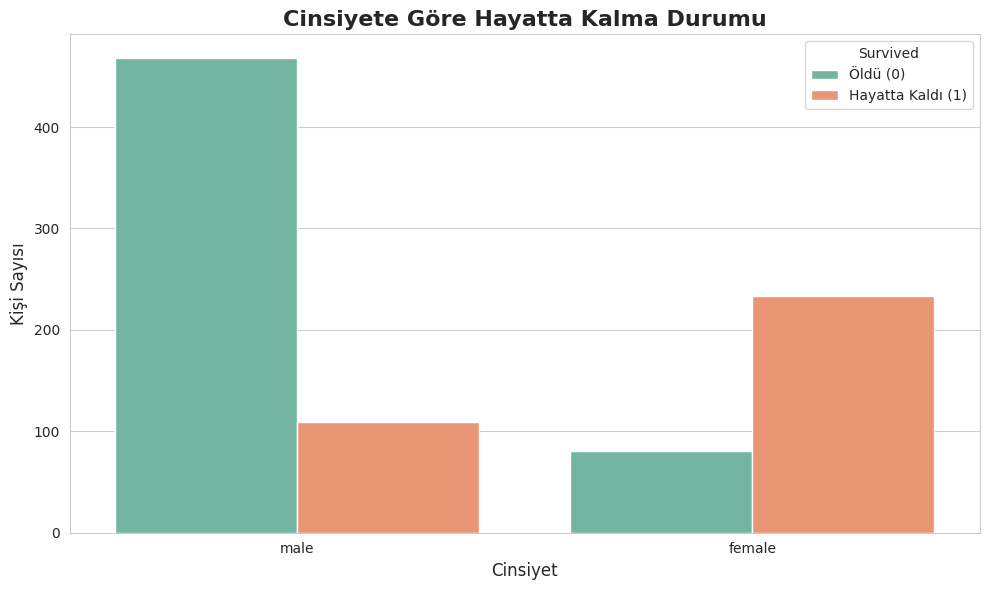

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Cinsiyete göre hayatta kalma grafiği
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')

# Grafik düzenlemeleri
plt.title('Cinsiyete Göre Hayatta Kalma Durumu', fontsize=16, fontweight='bold')
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.legend(title='Survived', labels=['Öldü (0)', 'Hayatta Kaldı (1)'])
plt.tight_layout()

plt.show()

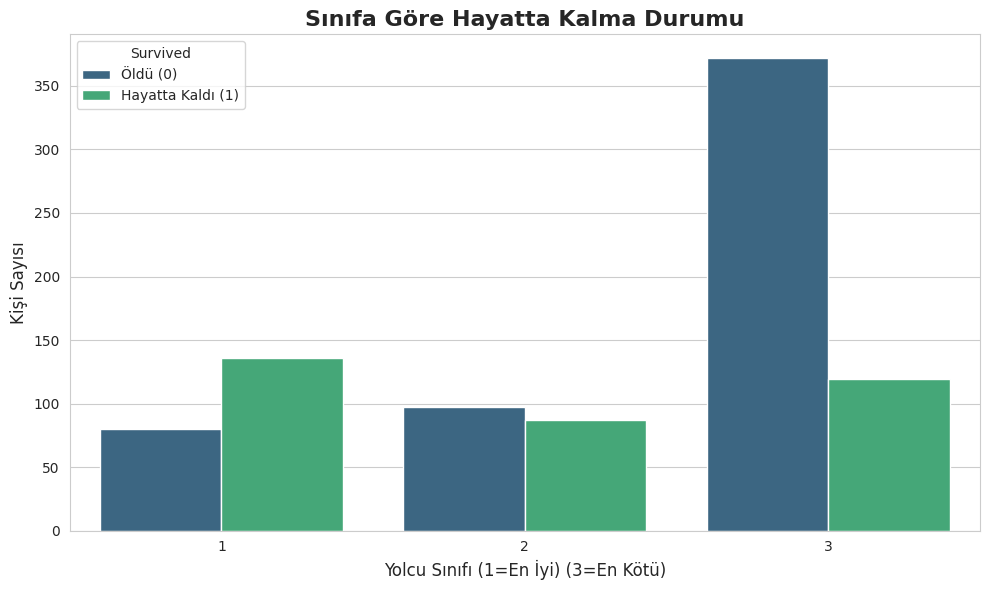

In [27]:
plt.figure(figsize=(10, 6))

# Sınıfa göre hayatta kalma
sns.countplot(data=df, x='Pclass', hue='Survived', palette='viridis')

plt.title('Sınıfa Göre Hayatta Kalma Durumu', fontsize=16, fontweight='bold')
plt.xlabel('Yolcu Sınıfı (1=En İyi) (3=En Kötü)', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.legend(title='Survived', labels=['Öldü (0)', 'Hayatta Kaldı (1)'])
plt.tight_layout()

plt.show()

/tmp/ipython-input-4127948758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='coolwarm')


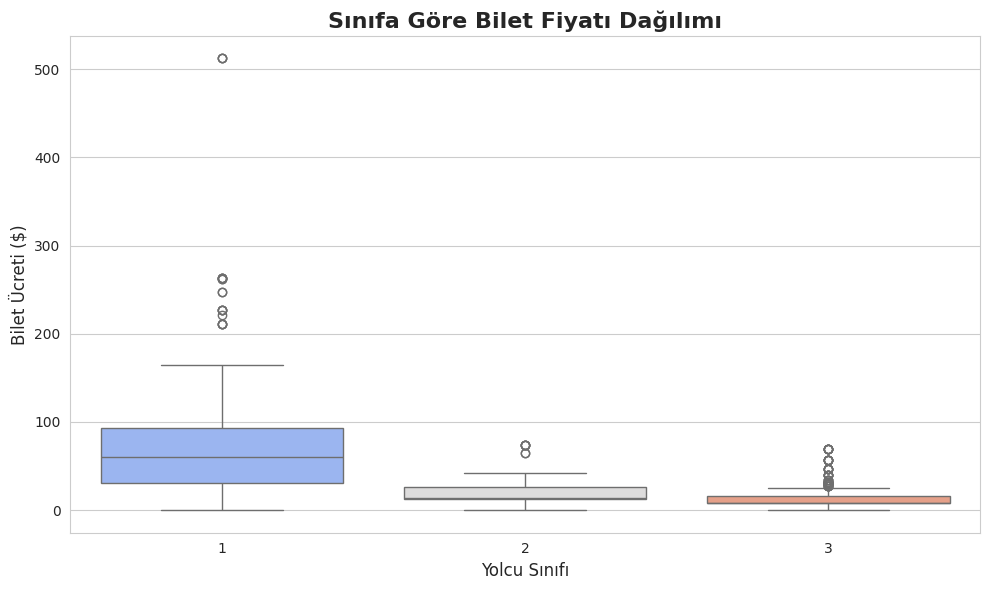

In [28]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(data=df, x='Pclass', y='Fare', palette='coolwarm')

plt.title('Sınıfa Göre Bilet Fiyatı Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Yolcu Sınıfı', fontsize=12)
plt.ylabel('Bilet Ücreti ($)', fontsize=12)
plt.tight_layout()

plt.show()

Yaş Grubuna Göre Hayatta Kalma:
           Hayatta Kalan  Toplam      Oran      Yuzde
Yas_Grubu                                            
Genç                  30      70  0.428571  42.857143
Yaşlı                  5      22  0.227273  22.727273
Yetişkin             267     730  0.365753  36.575342
Çocuk                 40      69  0.579710  57.971014


/tmp/ipython-input-2723942217.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Yas_Grubu', y='Survived',
/tmp/ipython-input-2723942217.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Yas_Grubu', y='Survived',


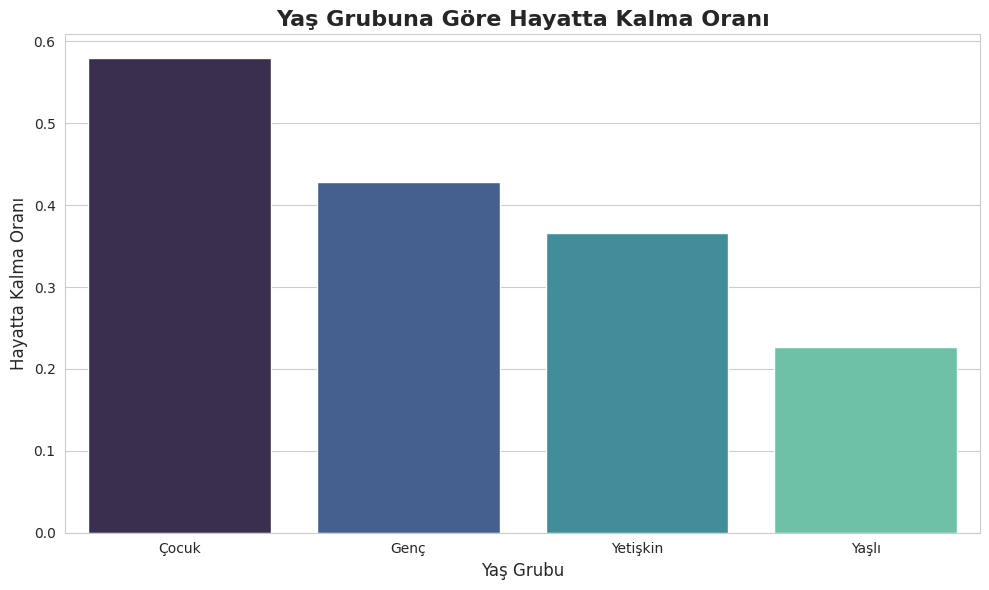

In [29]:
# Yaş grubuna göre hayatta kalma
yas_grubu_analiz = df.groupby('Yas_Grubu')['Survived'].agg(['sum', 'count', 'mean'])
yas_grubu_analiz.columns = ['Hayatta Kalan', 'Toplam', 'Oran']
yas_grubu_analiz['Yuzde'] = yas_grubu_analiz['Oran'] * 100

print("Yaş Grubuna Göre Hayatta Kalma:")
print(yas_grubu_analiz)

# Görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Yas_Grubu', y='Survived',
            order=['Çocuk', 'Genç', 'Yetişkin', 'Yaşlı'],
            palette='mako', ci=None)

plt.title('Yaş Grubuna Göre Hayatta Kalma Oranı', fontsize=16, fontweight='bold')
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Hayatta Kalma Oranı', fontsize=12)
plt.tight_layout()

plt.show()

Sınıf ve Cinsiyete Göre Hayatta Kalma Yüzdesi:
Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64


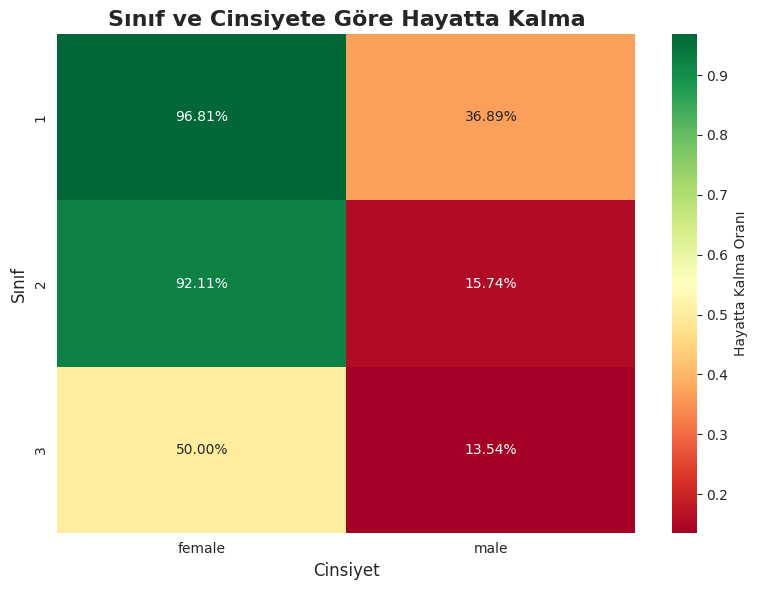

In [30]:
# Hem cinsiyete hem sınıfa göre
capraz_analiz = df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
print("Sınıf ve Cinsiyete Göre Hayatta Kalma Yüzdesi:")
print(capraz_analiz)

# Isı haritası
pivot_table = df.pivot_table(values='Survived',
                               index='Pclass',
                               columns='Sex',
                               aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2%', cmap='RdYlGn',
            cbar_kws={'label': 'Hayatta Kalma Oranı'})

plt.title('Sınıf ve Cinsiyete Göre Hayatta Kalma', fontsize=16, fontweight='bold')
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Sınıf', fontsize=12)
plt.tight_layout()
plt.show()

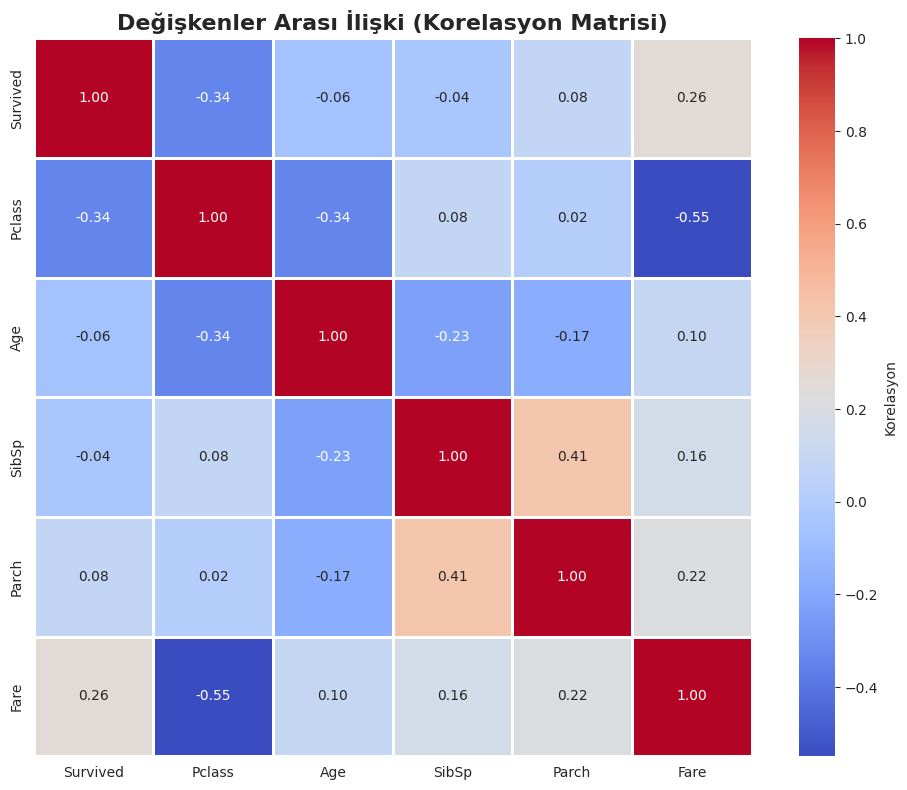

In [32]:
# Sayısal sütunlar arasındaki ilişki
sayisal_sutunlar = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
korelasyon = df[sayisal_sutunlar].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={'label': 'Korelasyon'})

plt.title('Değişkenler Arası İlişki (Korelasyon Matrisi)', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

In [40]:
# Toplu Gösterimi
print("================================")
print("TİTANİC VERİ ANALİZİ - SON RAPOR")
print("================================")

print(f"\nGENEL İSTATİSTİKLER:")
print("--------------------")
print(f"Toplam Yolcu: {len(df)}")
print(f"Hayatta Kalan: {df['Survived'].sum()} (%{df['Survived'].mean()*100:.1f})")
print(f"Ölen: {len(df) - df['Survived'].sum()} (%{(1-df['Survived'].mean())*100:.1f})")

print(f"\nCİNSİYETE GÖRE:")
print("---------------")
for cinsiyet in ['male', 'female']:
    oran = df[df['Sex'] == cinsiyet]['Survived'].mean() * 100
    print(f"{cinsiyet.capitalize()}: %{oran:.1f} hayatta kaldı")

print(f"\nSINIFA GÖRE:")
print("------------")
for sinif in [1, 2, 3]:
    oran = df[df['Pclass'] == sinif]['Survived'].mean() * 100
    print(f"{sinif}. Sınıf: %{oran:.1f} hayatta kaldı")

print(f"\nYAŞ GRUBUNA GÖRE:")
print("-----------------")
for grup in ['Çocuk', 'Genç', 'Yetişkin', 'Yaşlı']:
    if grup in df['Yas_Grubu'].values:
        oran = df[df['Yas_Grubu'] == grup]['Survived'].mean() * 100
        print(f"{grup}: %{oran:.1f} hayatta kaldı")

print("\n" + "=================")
print("ANALİZ TAMAMLANDI")
print("=================")

TİTANİC VERİ ANALİZİ - SON RAPOR

GENEL İSTATİSTİKLER:
--------------------
Toplam Yolcu: 891
Hayatta Kalan: 342 (%38.4)
Ölen: 549 (%61.6)

CİNSİYETE GÖRE:
---------------
Male: %18.9 hayatta kaldı
Female: %74.2 hayatta kaldı

SINIFA GÖRE:
------------
1. Sınıf: %63.0 hayatta kaldı
2. Sınıf: %47.3 hayatta kaldı
3. Sınıf: %24.2 hayatta kaldı

YAŞ GRUBUNA GÖRE:
-----------------
Çocuk: %58.0 hayatta kaldı
Genç: %42.9 hayatta kaldı
Yetişkin: %36.6 hayatta kaldı
Yaşlı: %22.7 hayatta kaldı

ANALİZ TAMAMLANDI
